Some plotting functions for these models...

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Best test loss epoch
def find_best_epoch(metrics_csv):
    df = pd.read_csv(metrics_csv)
    best_epoch = df.loc[df['Test RMSE'].idxmin()]
    return int(best_epoch['Epoch']), best_epoch['Test RMSE']

# Last epoch
def find_last_epoch(metrics_csv, epoch=-1):
    df = pd.read_csv(metrics_csv)
    last_epoch = df.iloc[epoch]
    return int(last_epoch['Epoch']), last_epoch['Test RMSE']

# Best test loss epoch (BE)
def find_best_epoch_BE(metrics_csv):
    df = pd.read_csv(metrics_csv)
    best_binding_epoch = df.loc[df['Test Binding RMSE'].idxmin()]
    best_expression_epoch = df.loc[df['Test Expression RMSE'].idxmin()]
    best_epoch = df.loc[df['Test RMSE'].idxmin()]
    return ( 
        (int(best_binding_epoch['Epoch']), best_epoch['Test Binding RMSE']), 
        (int(best_expression_epoch['Epoch']), best_epoch['Test Expression RMSE']),
        (int(best_epoch['Epoch']), best_epoch['Test RMSE'])
    )

# Last epoch (BE)
def find_last_epoch_BE(metrics_csv):
    df = pd.read_csv(metrics_csv)
    last_epoch = df.iloc[-1]
    return int(last_epoch['Epoch']), last_epoch['Test Binding RMSE'], last_epoch['Test Expression RMSE'], last_epoch['Test RMSE']   

In [31]:
def plot_log_file(metrics_csv, metrics_img):
    df = pd.read_csv(metrics_csv)

    # Plotting
    sns.set_theme(style="darkgrid")
    plt.subplots(figsize=(16, 9))
    fontsize = 28

    # Plot Best Test Loss
    best_epoch, best_test_rmse = find_best_epoch(metrics_csv)
    plt.annotate(
        f'({best_epoch}, {best_test_rmse:.4f})', (best_epoch, best_test_rmse), 
        textcoords="offset points", xytext=(50,50), ha='center', color='tab:blue', fontsize=fontsize-10,
        arrowprops=dict(arrowstyle="-", color='tab:blue', lw=2)
    )

    # Plot Loss
    plt.plot(df['Epoch'], df['Test RMSE'], label='Test RMSE', color='tab:blue', linewidth=3)
    plt.plot(df['Epoch'], df['Train RMSE'], label='Train RMSE', color='tab:orange', linewidth=3)

    plt.xlabel('Epochs', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.xlim(-50, 1050)
    plt.ylabel('RMSE', fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.ylim(-0.1, 1.5)
    plt.legend(loc='upper right', fontsize=fontsize)

    plt.tight_layout()
    plt.savefig(metrics_img, format='pdf')
    plt.savefig(metrics_img.replace('.pdf', '.png'), format='png')

def plot_log_file_BE(metrics_csv, metrics_img):
    df = pd.read_csv(metrics_csv)

    # Plotting
    sns.set_theme(style="darkgrid")
    fontsize = 28
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 18))  # 2 rows, 1 column

    # Plot 1: Training Metrics (binding, expression, combined RMSE)
    ax1.plot(df['Epoch'], df['Train Binding RMSE'], label='Train Binding RMSE', color='tab:blue', linewidth=3)
    ax1.plot(df['Epoch'], df['Train Expression RMSE'], label='Train Expression RMSE', color='tab:green', linewidth=3)
    ax1.plot(df['Epoch'], df['Train RMSE'], label='Train RMSE (Combined)', color='tab:orange', linewidth=3)

    ax1.tick_params(axis='x', labelsize=fontsize)
    ax1.set_xlim(-50, 1050)
    ax1.set_ylabel('RMSE', fontsize=fontsize)
    ax1.tick_params(axis='y', labelsize=fontsize)
    ax1.set_ylim(-0.1, 1.5)
    ax1.legend(loc='upper right', fontsize=fontsize)
    ax1.set_title('Training Metrics', fontsize=fontsize)

    # Plot Best Test Loss
    best_binding, best_expression, best_combo = find_best_epoch_BE(metrics_csv)
    ax2.annotate(
        f'({best_binding[0]}, {best_binding[1]:.4f})', best_binding, 
        textcoords="offset points", xytext=(50,-50), ha='center', color='tab:blue', fontsize=fontsize-10,
        arrowprops=dict(arrowstyle="-", color='tab:blue', lw=2)
    )
    ax2.annotate(
        f'({best_expression[0]}, {best_expression[1]:.4f})', best_expression, 
        textcoords="offset points", xytext=(50,-50), ha='center', color='tab:green', fontsize=fontsize-10,
        arrowprops=dict(arrowstyle="-", color='tab:green', lw=2)
    )
    ax2.annotate(
        f'({best_combo[0]}, {best_combo[1]:.4f})', best_combo, 
        textcoords="offset points", xytext=(50,50), ha='center', color='tab:orange', fontsize=fontsize-10,
        arrowprops=dict(arrowstyle="-", color='tab:orange', lw=2)
    )

    # Plot 2: Testing Metrics (binding, expression, combined RMSE)
    ax2.plot(df['Epoch'], df['Test Binding RMSE'], label='Test Binding RMSE', color='tab:blue', linewidth=3)
    ax2.plot(df['Epoch'], df['Test Expression RMSE'], label='Test Expression RMSE', color='tab:green', linewidth=3)
    ax2.plot(df['Epoch'], df['Test RMSE'], label='Test RMSE (Combined)', color='tab:orange', linewidth=3)

    ax2.set_xlabel('Epochs', fontsize=fontsize)
    ax2.tick_params(axis='x', labelsize=fontsize)
    ax2.set_xlim(-50, 1050)
    ax2.set_ylabel('RMSE', fontsize=fontsize)
    ax2.tick_params(axis='y', labelsize=fontsize)
    ax2.set_ylim(-0.1, 1.5)
    ax2.legend(loc='upper right', fontsize=fontsize)
    ax2.set_title('Testing Metrics', fontsize=fontsize)

    plt.tight_layout()
    plt.savefig(metrics_img, format='pdf')
    plt.savefig(metrics_img.replace('.pdf', '.png'), format='png')

def plot_comparative_log_file(metrics_csv_1, metrics_csv_2, metrics_csv_3, metrics_img):
    df1 = pd.read_csv(metrics_csv_1)
    df2 = pd.read_csv(metrics_csv_2)
    df3 = pd.read_csv(metrics_csv_3)

    sns.set_theme(style="darkgrid")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 18))  # 2 rows, 1 column
    fontsize = 28

    # Plot 1: Training Metrics (binding, expression, combined RMSE)
    ax1.plot(df1['Epoch'], df1['Train RMSE'], label='Train Binding RMSE (solo)', color='tab:blue', linestyle='--', linewidth=2)
    ax1.plot(df2['Epoch'], df2['Train RMSE'], label='Train Expression RMSE (solo)', color='tab:green', linestyle='--', linewidth=2)
    ax1.plot(df3['Epoch'], df3['Train Binding RMSE'], label='Train Binding RMSE', color='tab:blue', linewidth=2)
    ax1.plot(df3['Epoch'], df3['Train Expression RMSE'], label='Train Expression RMSE', color='tab:green', linewidth=2)
    ax1.plot(df3['Epoch'], df3['Train RMSE'], label='Train RMSE (Combined)', color='tab:orange', linewidth=2)

    ax1.tick_params(axis='x', labelsize=fontsize)    
    ax1.set_xlim(-50, 1050)
    ax1.set_ylabel('RMSE', fontsize=fontsize)
    ax1.tick_params(axis='y', labelsize=fontsize)
    ax1.set_ylim(-0.1, 1.5)
    ax1.legend(loc='upper right', fontsize=fontsize)
    ax1.set_title('Training Metrics', fontsize=fontsize)

    # Plot Best Test Loss
    best_binding_solo = find_best_epoch(metrics_csv_1)
    best_expression_solo = find_best_epoch(metrics_csv_2)
    best_binding, best_expression, best_combo = find_best_epoch_BE(metrics_csv_3)
    ax2.annotate(
        f'({best_binding_solo[0]}, {best_binding_solo[1]:.4f})', best_binding_solo, 
        textcoords="offset points", xytext=(30,-50), ha='center', color='tab:blue', fontsize=fontsize-10,
        arrowprops=dict(arrowstyle="-", linestyle='--', color='tab:blue', lw=2)
    )
    ax2.annotate(
        f'({best_expression_solo[0]}, {best_expression_solo[1]:.4f})', best_expression_solo, 
        textcoords="offset points", xytext=(0,-50), ha='center', color='tab:green', fontsize=fontsize-10,
        arrowprops=dict(arrowstyle="-", linestyle='--', color='tab:green', lw=2)
    )
    ax2.annotate(
        f'({best_binding[0]}, {best_binding[1]:.4f})', best_binding, 
        textcoords="offset points", xytext=(135,-25), ha='center', color='tab:blue', fontsize=fontsize-10,
        arrowprops=dict(arrowstyle="-", color='tab:blue', lw=2)
    )
    ax2.annotate(
        f'({best_expression[0]}, {best_expression[1]:.4f})', best_expression, 
        textcoords="offset points", xytext=(120,-40), ha='center', color='tab:green', fontsize=fontsize-10,
        arrowprops=dict(arrowstyle="-", color='tab:green', lw=2)
    )
    ax2.annotate(
        f'({best_combo[0]}, {best_combo[1]:.4f})', best_combo, 
        textcoords="offset points", xytext=(50,50), ha='center', color='tab:orange', fontsize=fontsize-10,
        arrowprops=dict(arrowstyle="-", color='tab:orange', lw=2)
    )

    # Plot 2: Testing Metrics (binding, expression, combined RMSE)
    ax2.plot(df1['Epoch'], df1['Test RMSE'], label='Test Binding RMSE (solo)', color='tab:blue', linestyle='--', linewidth=2)
    ax2.plot(df2['Epoch'], df2['Test RMSE'], label='Test Expression RMSE (solo)', color='tab:green', linestyle='--', linewidth=2)
    ax2.plot(df3['Epoch'], df3['Test Binding RMSE'], label='Test Binding RMSE', color='tab:blue', linewidth=2)
    ax2.plot(df3['Epoch'], df3['Test Expression RMSE'], label='Test Expression RMSE', color='tab:green', linewidth=2)
    ax2.plot(df3['Epoch'], df3['Test RMSE'], label='Test RMSE (Combined)', color='tab:orange', linewidth=2)

    ax2.set_xlabel('Epochs', fontsize=fontsize)
    ax2.tick_params(axis='x', labelsize=fontsize)
    ax2.set_xlim(-50, 1050)
    ax2.set_ylabel('RMSE', fontsize=fontsize)
    ax2.tick_params(axis='y', labelsize=fontsize)
    ax2.set_ylim(-0.1, 1.5)
    ax2.legend(loc='upper right', fontsize=fontsize)
    ax2.set_title('Testing Metrics', fontsize=fontsize)

    plt.tight_layout()
    plt.savefig(metrics_img, format='pdf')
    plt.savefig(metrics_img.replace('.pdf', '.png'), format='png')

---
## ESM-BLSTM
GPUs: ***1***

Parameters
- n_epochs = ***5000***
- batch_size = ***64***
- max_batch = ***-1***
- num_workers = ***64***

Optimizer
- lr = ***1e-5***

BLSTM 
- size = ***320***
- lstm_input_size = ***320***
- lstm_hidden_size = ***320***
- lstm_num_layers = ***1***       
- lstm_bidrectional = ***True***   
- fcn_hidden_size = ***320***

Best ESM_BLSTM: 
	Epoch: 65 | Test Loss: 0.5657
Last ESM_BLSTM: 
	Epoch: 2905 | Test Loss: 0.6153


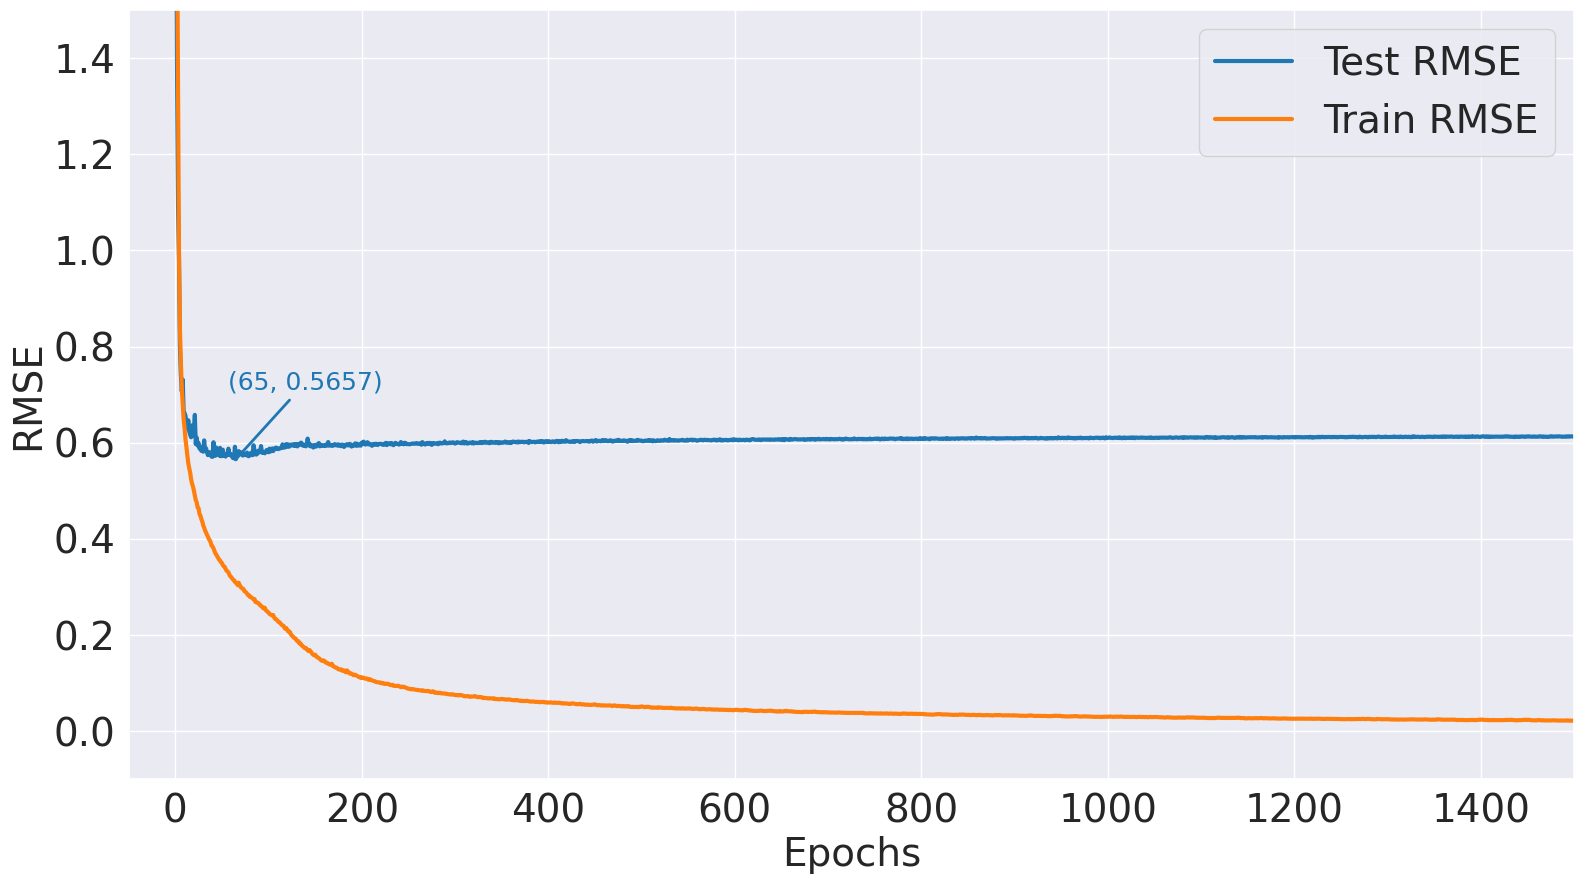

In [284]:
# ESM-BLSTM using DMS OLD dataset (binding)
run1 = "../../results/run_results/esm_blstm/esm_blstm-DMS_OLD-binding-2024-10-09_22-54/esm_blstm-DMS_OLD_binding-train_82178_test_20545"
plot_log_file(run1 + "_metrics.csv", run1 + "_metrics.pdf")

run1_best_results = find_best_epoch(run1 + "_metrics.csv")
print(f"Best {run1.split('/')[4].upper()}: \n\tEpoch: {run1_best_results[0]} | Test Loss: {run1_best_results[1]:.4f}")
run1_last_results = find_last_epoch(run1 + "_metrics.csv")
print(f"Last {run1.split('/')[4].upper()}: \n\tEpoch: {run1_last_results[0]} | Test Loss: {run1_last_results[1]:.4f}")

Best ESM_BLSTM: 
	Epoch: 60 | Test Loss: 0.3411
Last ESM_BLSTM: 
	Epoch: 2916 | Test Loss: 0.4461


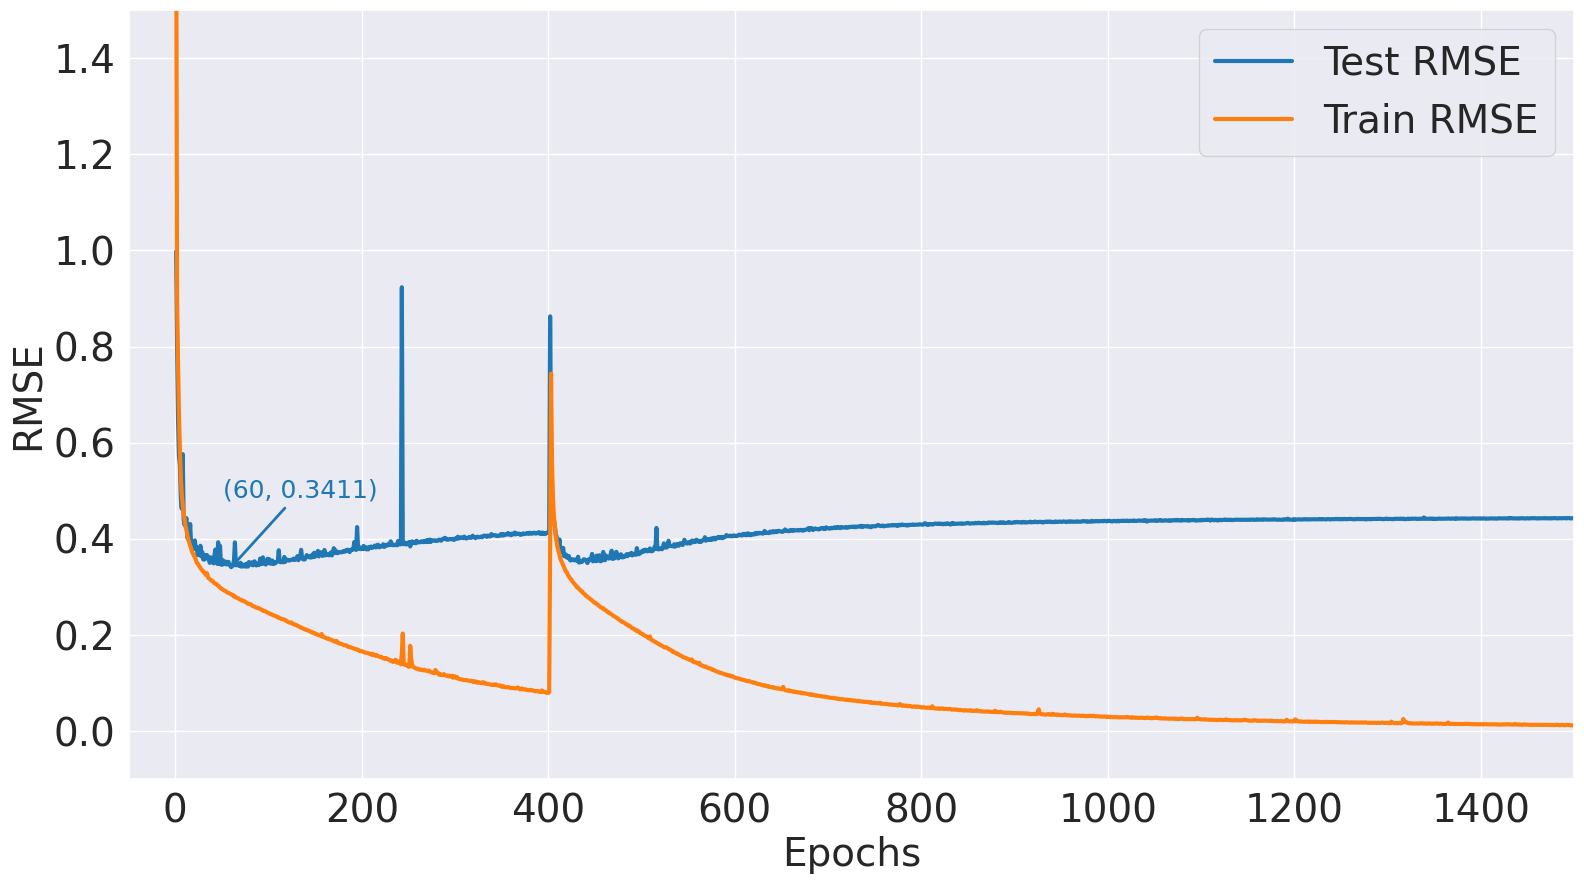

In [285]:
# ESM-BLSTM using DMS OLD dataset (expression)
run2 = "../../results/run_results/esm_blstm/esm_blstm-DMS_OLD-expression-2024-10-09_22-53/esm_blstm-DMS_OLD_expression-train_82178_test_20545"
plot_log_file(run2 + "_metrics.csv", run2 + "_metrics.pdf")

run2_best_results = find_best_epoch(run2 + "_metrics.csv")
print(f"Best {run2.split('/')[4].upper()}: \n\tEpoch: {run2_best_results[0]} | Test Loss: {run2_best_results[1]:.4f}")
run2_last_results = find_last_epoch(run2 + "_metrics.csv")
print(f"Last {run2.split('/')[4].upper()}: \n\tEpoch: {run2_last_results[0]} | Test Loss: {run2_last_results[1]:.4f}")

Best ESM_BLSTM: 
	Epoch: 69 | Test Binding RMSE: 0.5611586195409164
	Epoch: 71 | Test Expression RMSE: 0.3449879649990159
	Epoch: 69 | Test RMSE: 0.6587227740799276
Last ESM_BLSTM: 
	Epoch: 2899 
	Test Binding RMSE: 0.6116 
	Test Expression RMSE: 0.4527 
	Test RMSE: 0.7609


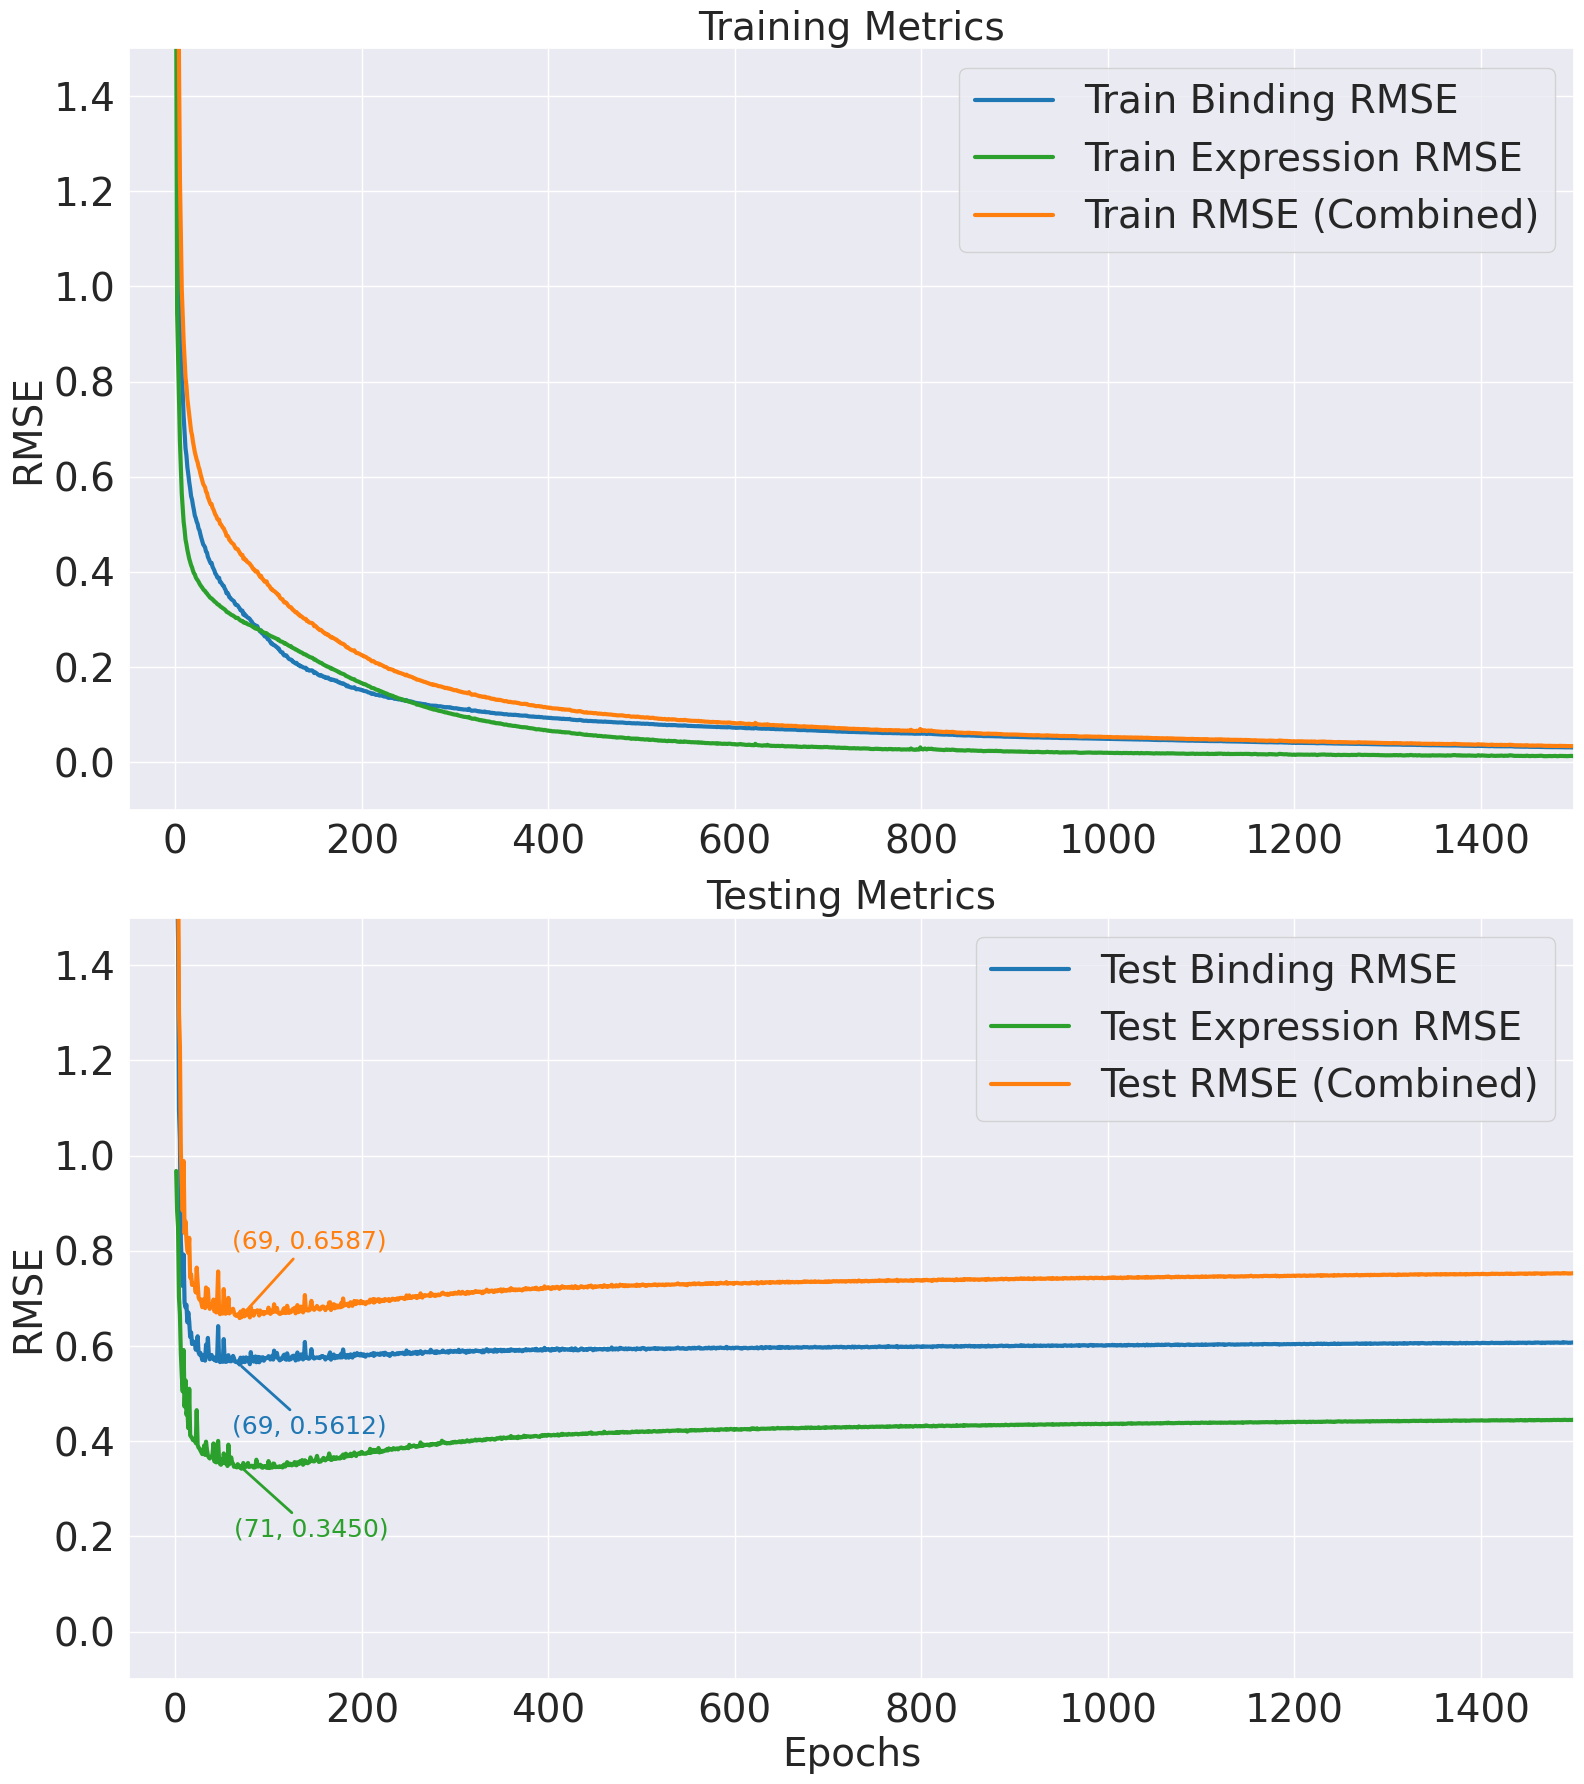

In [286]:
# ESM-BLSTM using DMS OLD dataset (binding and expression)
run3 = "../../results/run_results/esm_blstm/esm_blstm-DMS_OLD_BE-2024-10-09_22-47/esm_blstm-DMS_OLD_BE-train_82178_test_20545"
plot_log_file_BE(run3 + "_metrics.csv", run3 + "_metrics.pdf")

best_binding, best_expression, best_combo = find_best_epoch_BE(run3 + "_metrics.csv")
print(
    f"Best {run3.split('/')[4].upper()}: \n\tEpoch: {best_binding[0]} | Test Binding RMSE: {best_binding[1]}"
    f"\n\tEpoch: {best_expression[0]} | Test Expression RMSE: {best_expression[1]}"
    f"\n\tEpoch: {best_combo[0]} | Test RMSE: {best_combo[1]}"
)
run3_last_results = find_last_epoch_BE(run3 + "_metrics.csv")
print(f"Last {run3.split('/')[4].upper()}: \n\tEpoch: {run3_last_results[0]} \n\tTest Binding RMSE: {run3_last_results[1]:.4f} \n\tTest Expression RMSE: {run3_last_results[2]:.4f} \n\tTest RMSE: {run3_last_results[3]:.4f}")

### Comparison

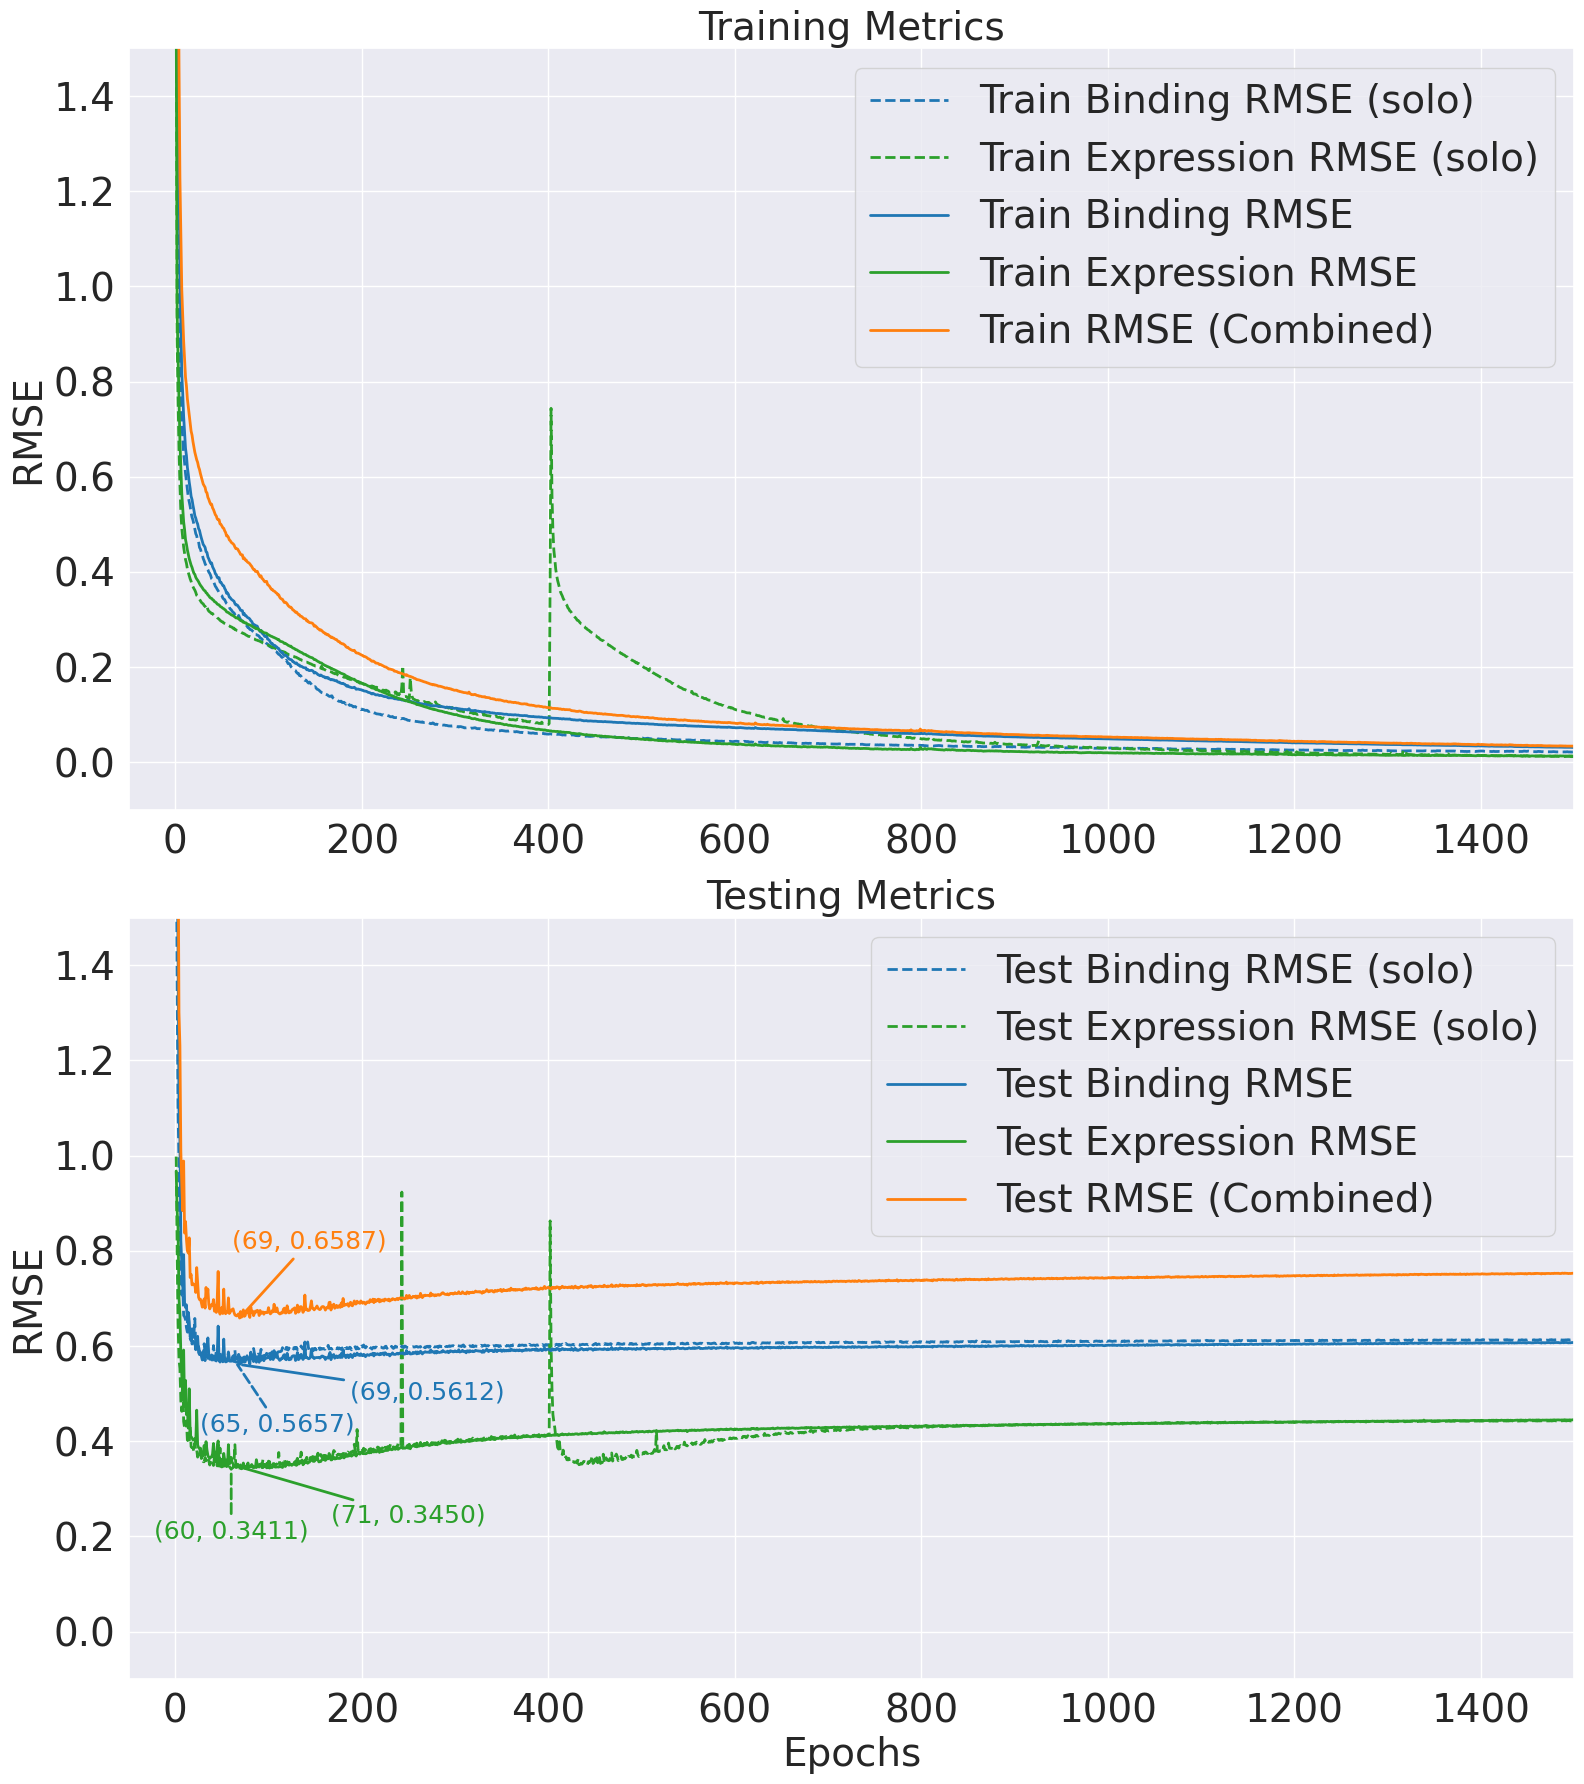

In [287]:
metrics_img = f"../../results/plots/model_comparisons/esm_finetuning/esm_blstm_solo.vs.esm_blstm_combined.metrics.pdf"
plot_comparative_log_file(
    metrics_csv_1=run1 + "_metrics.csv", 
    metrics_csv_2=run2 + "_metrics.csv", 
    metrics_csv_3=run3 + "_metrics.csv", 
    metrics_img=metrics_img
)

---
### ESM-FCN

Best ESM_FCN: 
	Epoch: 61 | Test Loss: 0.5702
Last ESM_FCN: 
	Epoch: 3027 | Test Loss: 0.6195


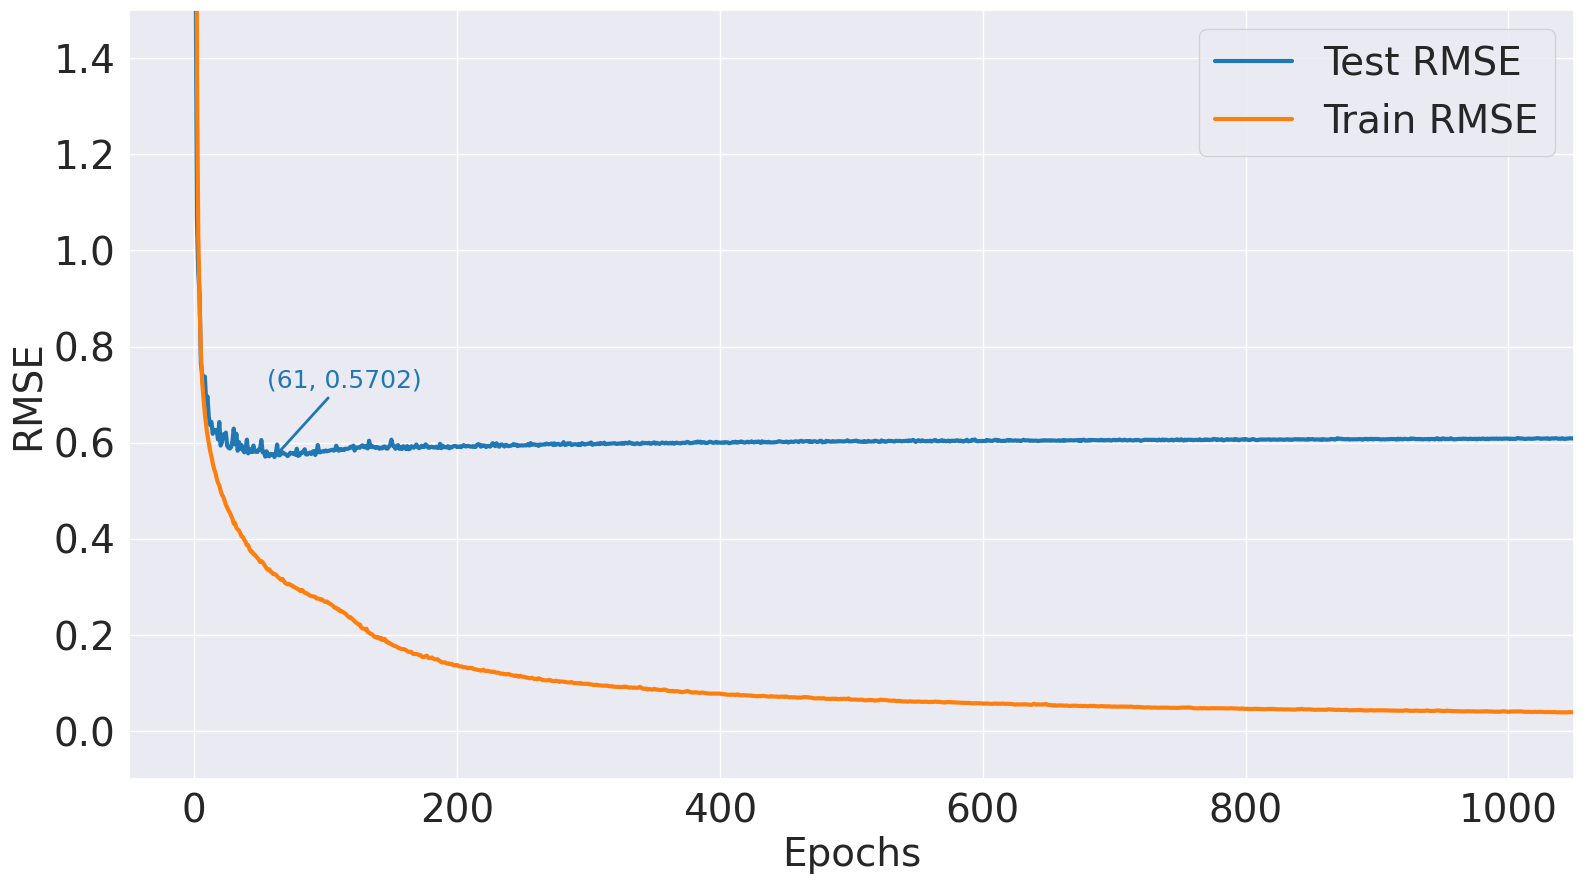

In [32]:
# ESM-FCN using DMS OLD dataset (binding)
run4 = "../../results/run_results/esm_fcn/esm_fcn-DMS_OLD-binding-2024-10-09_22-50/esm_fcn-DMS_OLD_binding-train_82178_test_20545"
plot_log_file(run4 + "_metrics.csv", run4 + "_metrics.pdf")

run4_best_results = find_best_epoch(run4 + "_metrics.csv")
print(f"Best {run4.split('/')[4].upper()}: \n\tEpoch: {run4_best_results[0]} | Test Loss: {run4_best_results[1]:.4f}")
run4_last_results = find_last_epoch(run4 + "_metrics.csv")
print(f"Last {run4.split('/')[4].upper()}: \n\tEpoch: {run4_last_results[0]} | Test Loss: {run4_last_results[1]:.4f}")

Best ESM_FCN: 
	Epoch: 67 | Test Loss: 0.3421
Last ESM_FCN: 
	Epoch: 3031 | Test Loss: 0.4453


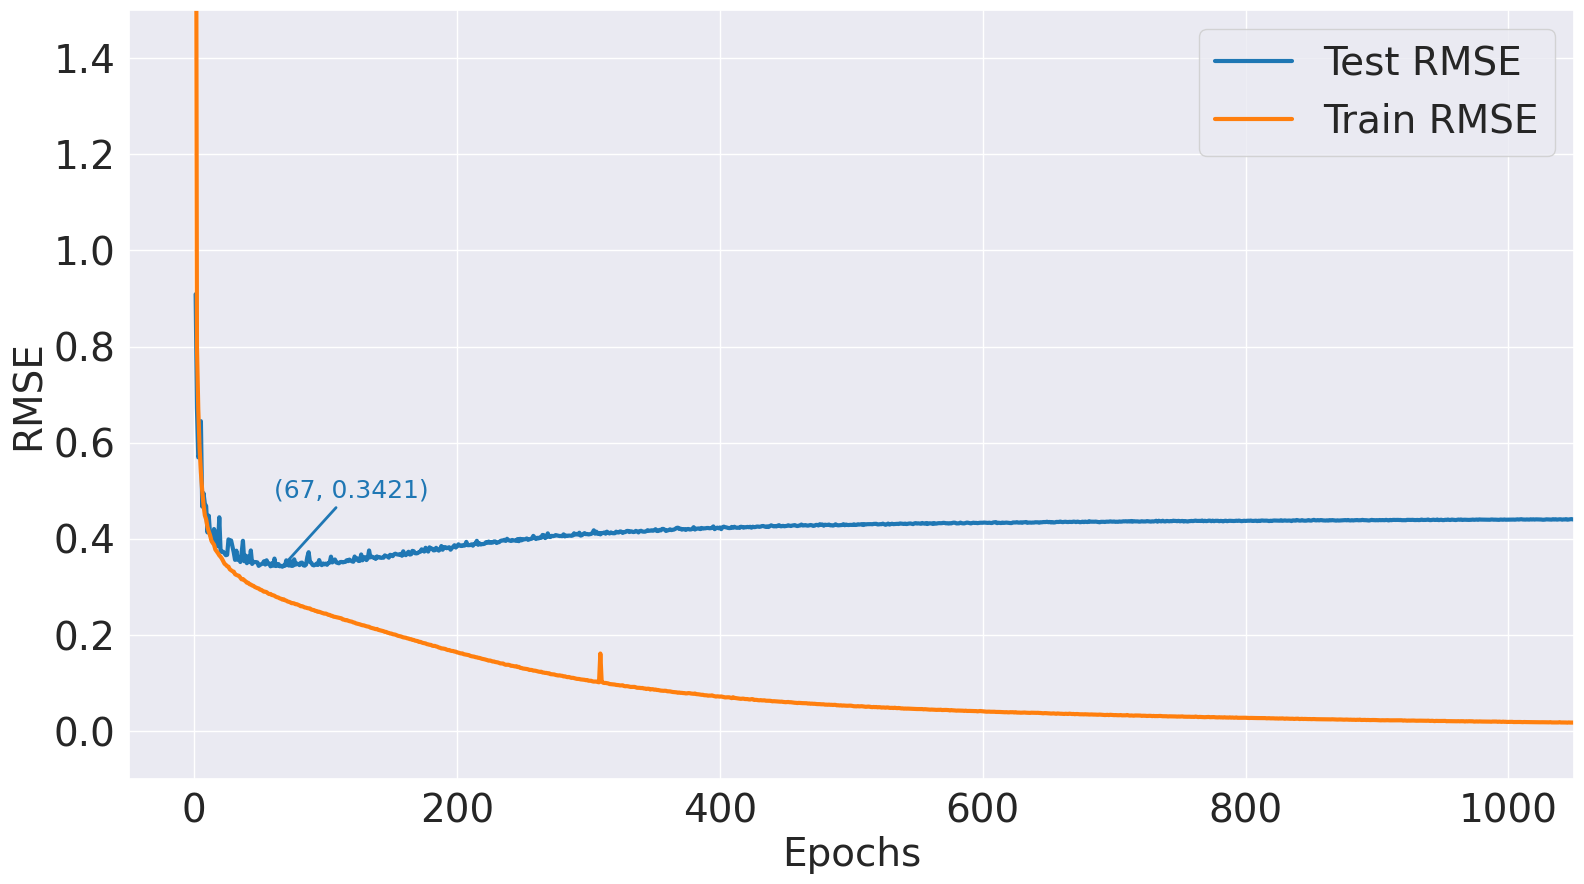

In [33]:
# ESM-FCN using DMS OLD dataset (expression)
run5 = "../../results/run_results/esm_fcn/esm_fcn-DMS_OLD-expression-2024-10-09_22-51/esm_fcn-DMS_OLD_expression-train_82178_test_20545"
plot_log_file(run5 + "_metrics.csv", run5 + "_metrics.pdf")

run5_best_results = find_best_epoch(run5 + "_metrics.csv")
print(f"Best {run5.split('/')[4].upper()}: \n\tEpoch: {run5_best_results[0]} | Test Loss: {run5_best_results[1]:.4f}")
run5_last_results = find_last_epoch(run5 + "_metrics.csv")
print(f"Last {run5.split('/')[4].upper()}: \n\tEpoch: {run5_last_results[0]} | Test Loss: {run5_last_results[1]:.4f}")

Best ESM_FCN: 
	Epoch: 52 | Test Binding RMSE: 0.5630541821042546
	Epoch: 71 | Test Expression RMSE: 0.3427805029446033
	Epoch: 63 | Test RMSE: 0.6591877464663538
Last ESM_FCN: 
	Epoch: 3035 
	Test Binding RMSE: 0.6217 
	Test Expression RMSE: 0.4495 
	Test RMSE: 0.7672


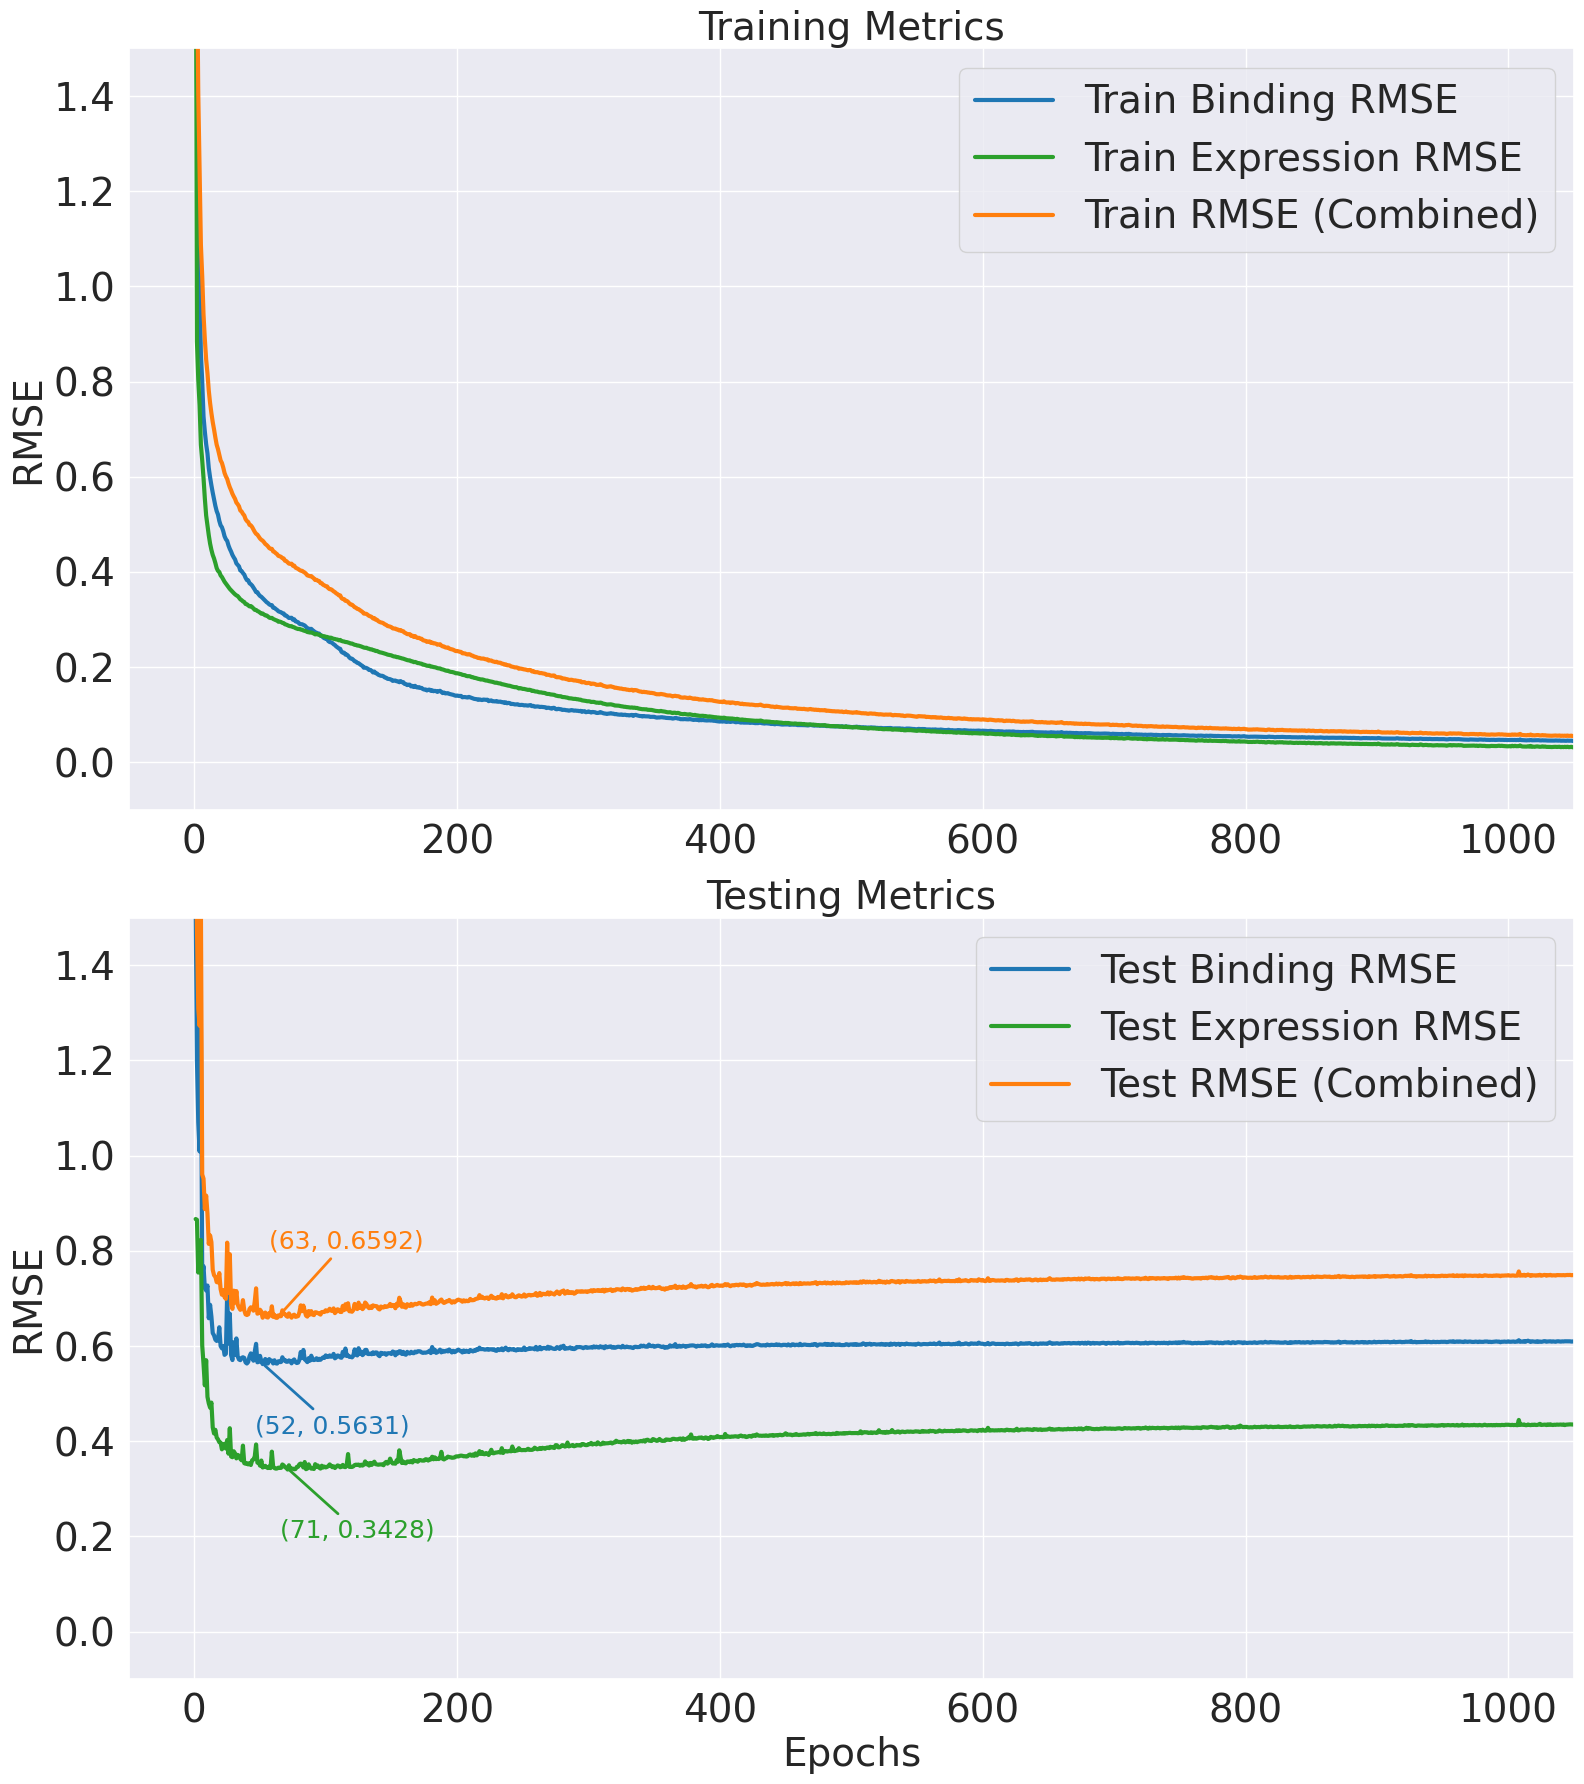

In [34]:
# ESM-FCN using DMS OLD dataset (binding and expression)
run6 = "../../results/run_results/esm_fcn/esm_fcn-DMS_OLD_BE-2024-10-09_22-49/esm_fcn-DMS_OLD_BE-train_82178_test_20545"
plot_log_file_BE(run6 + "_metrics.csv", run6 + "_metrics.pdf")

best_binding, best_expression, best_combo = find_best_epoch_BE(run6 + "_metrics.csv")
print(
    f"Best {run6.split('/')[4].upper()}: \n\tEpoch: {best_binding[0]} | Test Binding RMSE: {best_binding[1]}"
    f"\n\tEpoch: {best_expression[0]} | Test Expression RMSE: {best_expression[1]}"
    f"\n\tEpoch: {best_combo[0]} | Test RMSE: {best_combo[1]}"
)
run6_last_results = find_last_epoch_BE(run6 + "_metrics.csv")
print(f"Last {run6.split('/')[4].upper()}: \n\tEpoch: {run6_last_results[0]} \n\tTest Binding RMSE: {run6_last_results[1]:.4f} \n\tTest Expression RMSE: {run6_last_results[2]:.4f} \n\tTest RMSE: {run6_last_results[3]:.4f}")

### Comparison

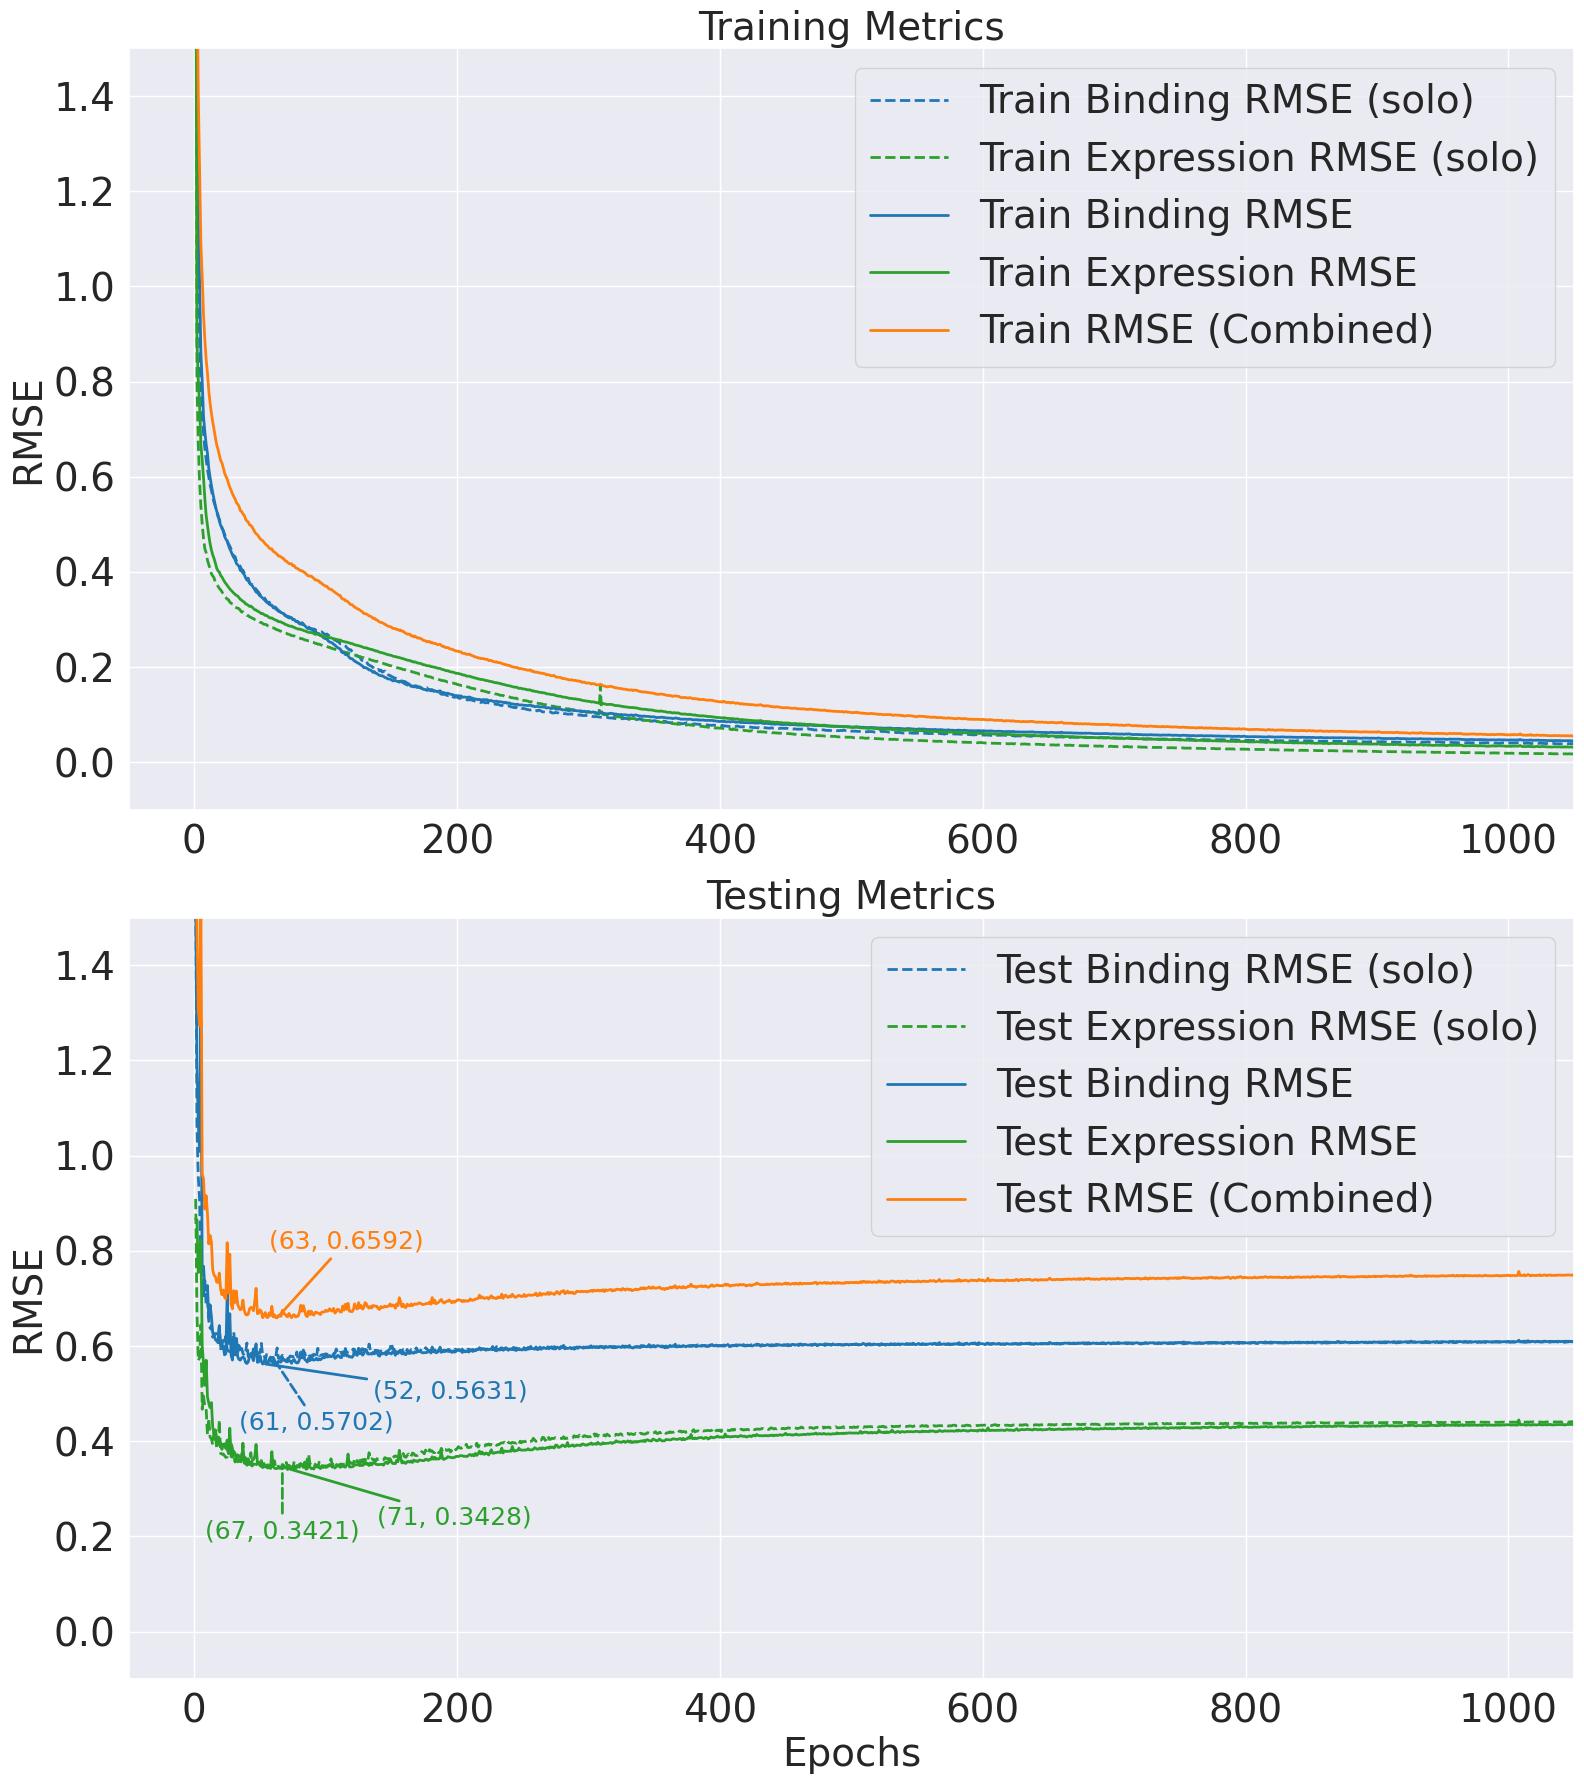

In [35]:
metrics_img = f"../../results/plots/model_comparisons/esm_finetuning/esm_fcn_solo.vs.esm_fcn_combined.metrics.pdf"
plot_comparative_log_file(
    metrics_csv_1=run4 + "_metrics.csv", 
    metrics_csv_2=run5 + "_metrics.csv", 
    metrics_csv_3=run6 + "_metrics.csv", 
    metrics_img=metrics_img
)

---
### ESM-GCN